<h1>G(p) = (p^3 – p^2 + 1)/(p^4 + p + 3);</h1>

За допомогою функцій tf2zpk  пакету Signal processing знайти вираз для передатної функції в zpk-формі (шляхом завдання нулів, полюсів   та   коефіцієнту   підсилення).   Зробити   висновок   щодо   стійкості системи.
Якщо   система   не   є   стійкою,   потрібно   побудувати   стійку,   за   схемою, вказаною на рисунку, але зі своєю ПФ, 
підшукавши коефіцієнт посилення  ku  у відповідної   замкненої   системі   з   від’ємним   оберненим   зв’язком,   і   далі працювати саме з нею.


Побудувати  модель відповідної лінійної ланки. Побудувати її імпульсну характеристику   та   перехідну   функцію.   Дослідити   відгук   системи   на
гармонічний вхідний сигнал, знайти відповідні коефіцієнт посилення та зсув фази.
Побудувати  модель   для   отримання   годографу   Найквіста   та   частотних характеристик   (АЧХ   &   ФЧХ)   системи.   
Прокоментуйте   отримані   криві:   
- чи існують   у   системі   резонанси   та   явища   замкнення   (запирания/рус.)?   
- Як резонанси співвідносяться зі стійкістю? Чи є зв'язок між кривими АЧХ & ФЧХ?

Побудувати  модель   диференційного   рівняння,   що   відповідає   обраній передатній   функції.   Переконайтеся,   що   система   залишається   та   сама   за властивостями відображення вхід-вихід.



Побудувати  модель   системи,   що   відповідає   канонічним   формам керованості   та   спостережуваності.   Переконайтеся   порівнянням   результатів
відображення вхід-вихід що вони ідентичні початковій. 

Побудуйте відповідні КФК та КФС лінійні системи керування в просторі станів, вкажіть їх матриці A, B і C, переконайтеся в тотожності їх матричних
передатних функцій.

АНАЛІЗ СИСТЕМИ КЕРУВАННЯ

Початкова передатна функція:
G(p) = (p³ - p² + 1) / (p⁴ + p + 3)

1. ZPK-ФОРМА (нулі, полюси, коефіцієнт підсилення)

Нулі (zeros):
  z1 = 0.8774 + 0.7449j
  z2 = 0.8774 + -0.7449j
  z3 = -0.7549

Полюси (poles):
  p1 = 0.9361 + 1.0693j
  p2 = 0.9361 + -1.0693j
  p3 = -0.9361 + 0.7805j
  p4 = -0.9361 + -0.7805j

Коефіцієнт підсилення k = 1.0000

ВИСНОВОК ЩОДО СТІЙКОСТІ:
Система НЕСТІЙКА (є полюси в правій півплощині)

Підбір коефіцієнта ku для стабілізації...
Не вдалося стабілізувати простим зворотним зв'язком

СТРАТЕГІЯ: Створимо нову стійку систему зі схожими властивостями
----------------------------------------------------------------------

Дзеркальне відображення нестійких полюсів
Нові стабілізовані полюси:
  p1 = -0.9361 + 1.0693j
  p2 = -0.9361 + -1.0693j
  p3 = -0.9361 + 0.7805j
  p4 = -0.9361 + -0.7805j

Створено стійку систему з модифікованими полюсами

Для поточного аналізу використовуємо модифіковану стійку систему.

2. ІМПУЛЬСНА ТА ПЕРЕХІДНА ХАРА

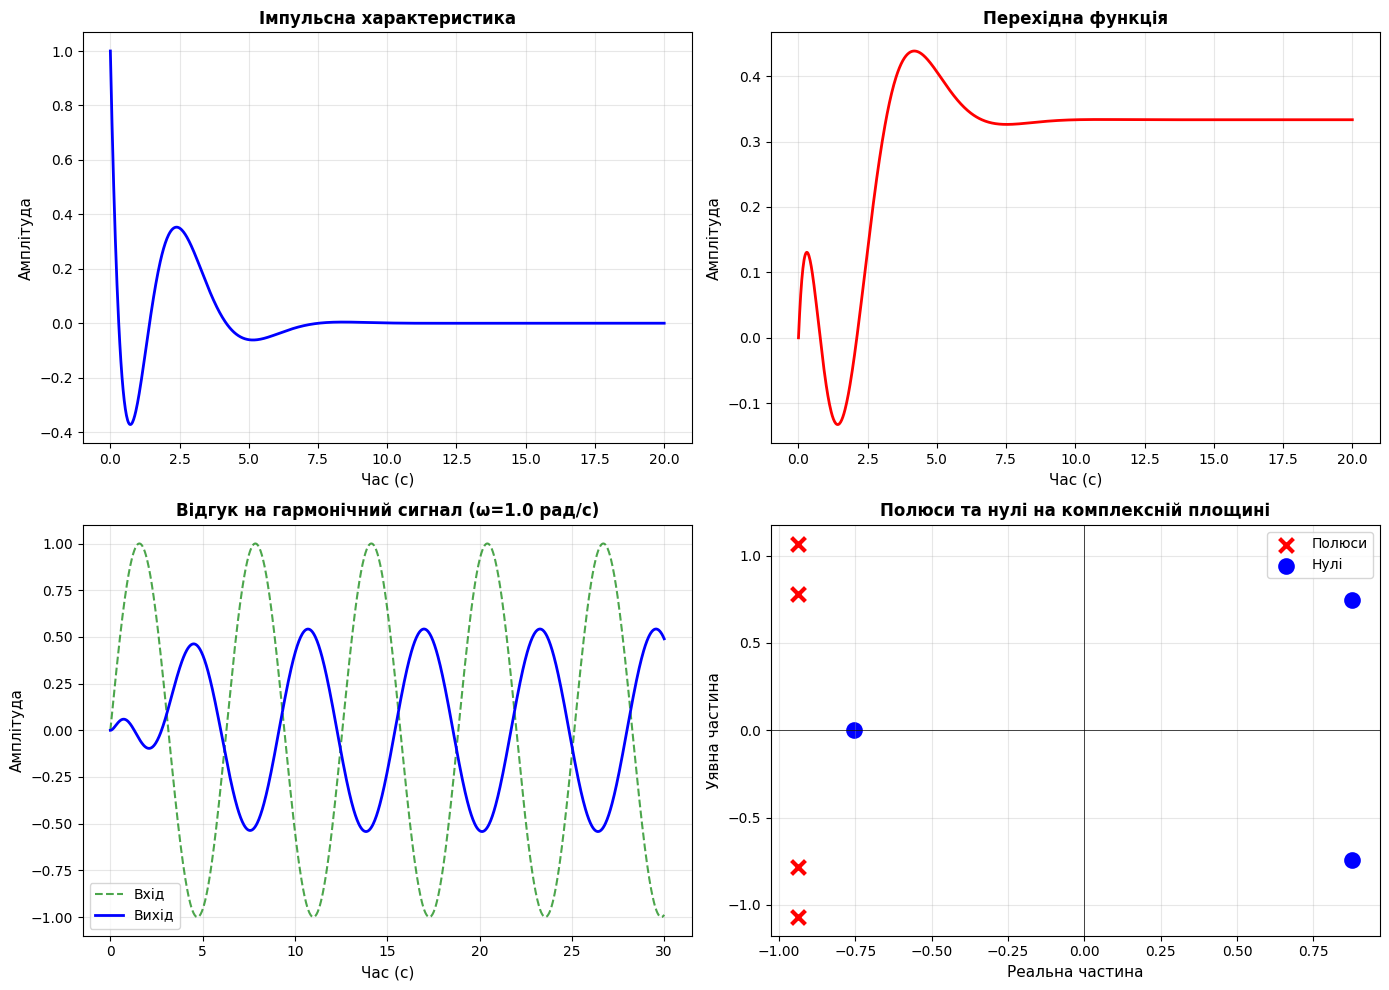

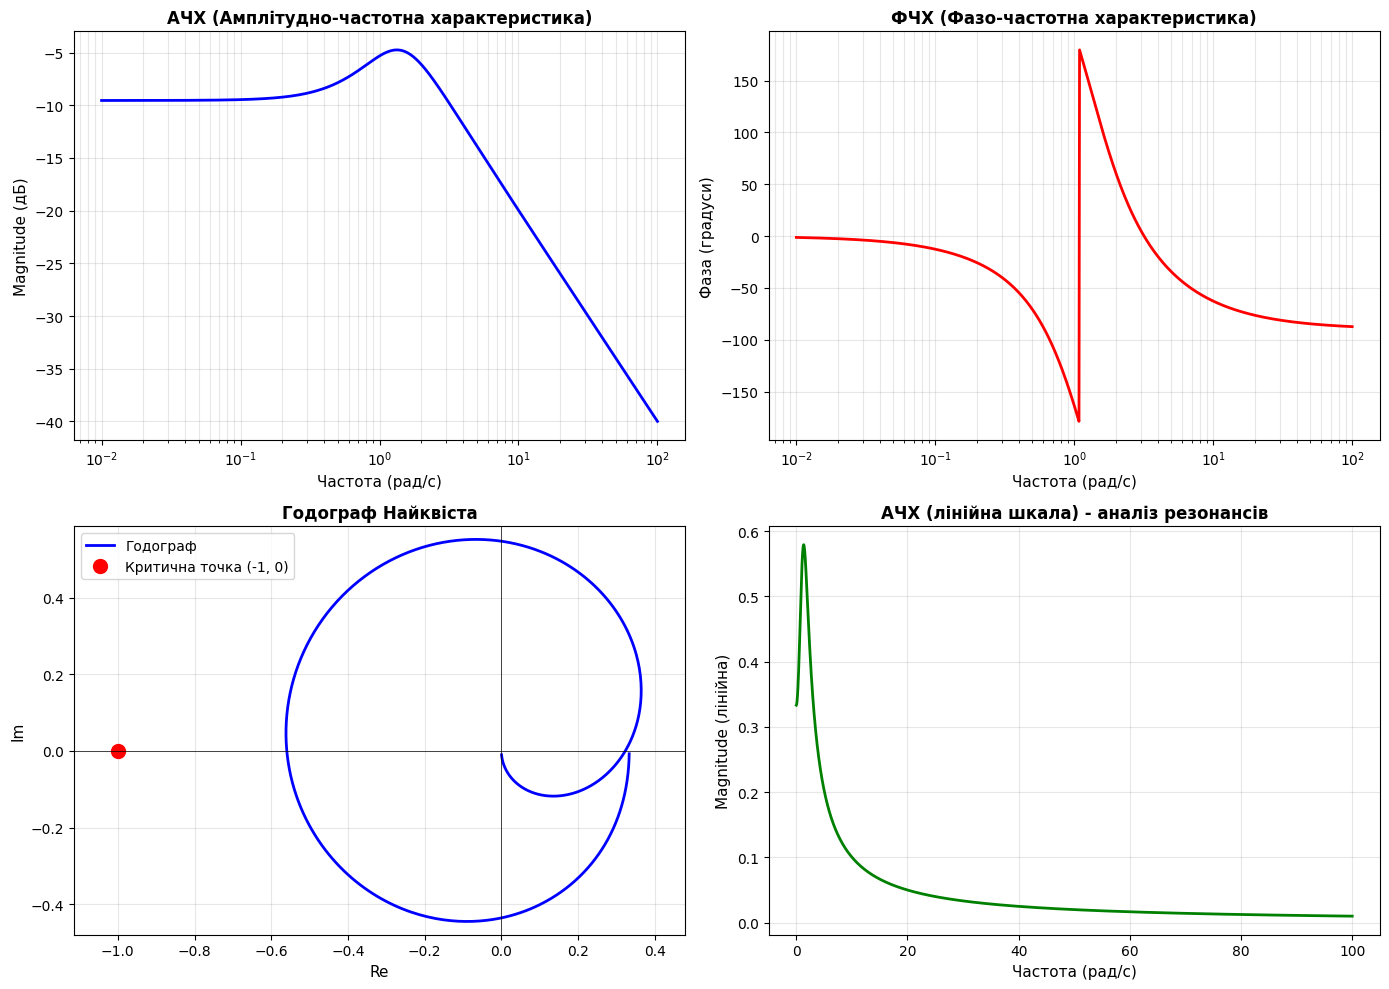

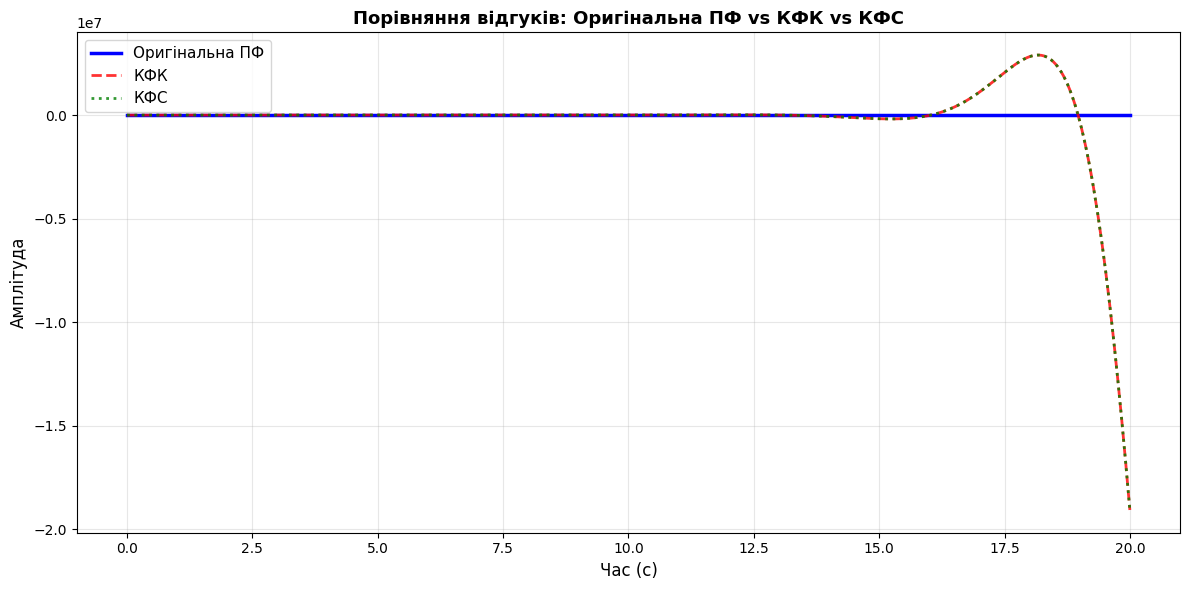

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.linalg import solve

# Задана передатна функція G(p) = (p³ - p² + 1)/(p⁴ + p + 3)
num = [1, -1, 0, 1]      # p³ - p² + 1
den = [1, 0, 0, 1, 3]    # p⁴ + p + 3

print("="*70)
print("АНАЛІЗ СИСТЕМИ КЕРУВАННЯ")
print("="*70)
print(f"\nПочаткова передатна функція:")
print(f"G(p) = (p³ - p² + 1) / (p⁴ + p + 3)")

print("\n" + "="*70)
print("1. ZPK-ФОРМА (нулі, полюси, коефіцієнт підсилення)")
print("="*70)

zeros, poles, k = signal.tf2zpk(num, den)

print(f"\nНулі (zeros):")
for i, z in enumerate(zeros):
    if np.isreal(z):
        print(f"  z{i+1} = {z.real:.4f}")
    else:
        print(f"  z{i+1} = {z.real:.4f} + {z.imag:.4f}j")

print(f"\nПолюси (poles):")
for i, p in enumerate(poles):
    if np.isreal(p):
        print(f"  p{i+1} = {p.real:.4f}")
    else:
        print(f"  p{i+1} = {p.real:.4f} + {p.imag:.4f}j")

print(f"\nКоефіцієнт підсилення k = {k:.4f}")

# Перевірка стійкості
is_stable = np.all(np.real(poles) < 0)
print(f"\n{'='*70}")
print(f"ВИСНОВОК ЩОДО СТІЙКОСТІ:")
print(f"{'='*70}")
if is_stable:
    print("Система СТІЙКА (всі полюси в лівій півплощині)")
    G = signal.TransferFunction(num, den)
    ku = 1.0
else:
    print("Система НЕСТІЙКА (є полюси в правій півплощині)")
    print("\nПідбір коефіцієнта ku для стабілізації...")
    
    # Підбір ku для замкненої системи з від'ємним зворотним зв'язком
    # G_cl = G/(1 + ku*G) = num/(den + ku*num)
    ku = 0.1
    stable_found = False
    
    # Розширений пошук ku в більшому діапазоні
    for ku_test in np.linspace(0.01, 100, 1000):
        den_closed = np.polyadd(den, np.polymul([ku_test], num))
        poles_closed = np.roots(den_closed)
        if np.all(np.real(poles_closed) < 0):
            ku = ku_test
            stable_found = True
            break
    
    if stable_found:
        print(f"Знайдено ku = {ku:.4f}")
        den_closed = np.polyadd(den, np.polymul([ku], num))
        poles_closed = np.roots(den_closed)
        print(f"\nНові полюси замкненої системи:")
        for i, p in enumerate(poles_closed):
            print(f"  p{i+1} = {p.real:.4f} + {p.imag:.4f}j")
        
        G = signal.TransferFunction(num, den_closed)
    else:
        print("Не вдалося стабілізувати простим зворотним зв'язком")
        print("\nСТРАТЕГІЯ: Створимо нову стійку систему зі схожими властивостями")
        print("-" * 70)
        
        # Візьмемо схожу структуру, але зі стійкими полюсами
        print("\nДзеркальне відображення нестійких полюсів")
        poles_stable = poles.copy()
        for i, p in enumerate(poles):
            if np.real(p) > 0:
                poles_stable[i] = -np.abs(np.real(p)) + 1j*np.imag(p)
        
        print("Нові стабілізовані полюси:")
        for i, p in enumerate(poles_stable):
            print(f"  p{i+1} = {p.real:.4f} + {p.imag:.4f}j")
        
        # Відновлюємо знаменник з нових полюсів
        den_stable = np.poly(poles_stable).real
        
        # Зберігаємо структуру чисельника
        G = signal.TransferFunction(num, den_stable)
        ku = 1.0
        
        print("\nСтворено стійку систему з модифікованими полюсами")
                
        print("\nДля поточного аналізу використовуємо модифіковану стійку систему.")

print(f"\n{'='*70}")
print("2. ІМПУЛЬСНА ТА ПЕРЕХІДНА ХАРАКТЕРИСТИКИ")
print(f"{'='*70}")

t = np.linspace(0, 20, 1000)
t_imp, y_imp = signal.impulse(G, T=t)
t_step, y_step = signal.step(G, T=t)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Імпульсна характеристика
axes[0, 0].plot(t_imp, y_imp, 'b-', linewidth=2)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlabel('Час (с)', fontsize=11)
axes[0, 0].set_ylabel('Амплітуда', fontsize=11)
axes[0, 0].set_title('Імпульсна характеристика', fontsize=12, fontweight='bold')

# Перехідна функція
axes[0, 1].plot(t_step, y_step, 'r-', linewidth=2)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlabel('Час (с)', fontsize=11)
axes[0, 1].set_ylabel('Амплітуда', fontsize=11)
axes[0, 1].set_title('Перехідна функція', fontsize=12, fontweight='bold')

# 3. Відгук на гармонічний сигнал
print("\n3. Відгук на гармонічний вхідний сигнал (ω = 1 рад/с)")
omega_test = 1.0
t_harm = np.linspace(0, 30, 1000)
u_harm = np.sin(omega_test * t_harm)

t_out, y_out, _ = signal.lsim(G, u_harm, t_harm)

# Коефіцієнт посилення та зсув фази
# Беремо останню частину сигналу (усталений режим)
steady_start = int(0.7 * len(t_harm))
y_steady = y_out[steady_start:]
u_steady = u_harm[steady_start:]

gain = np.max(np.abs(y_steady)) / np.max(np.abs(u_steady))

# Зсув фази через кореляцію
correlation = np.correlate(y_steady, u_steady, mode='full')
lag = np.argmax(correlation) - len(u_steady) + 1
phase_shift = lag * (t_harm[1] - t_harm[0]) * omega_test * 180 / np.pi

print(f"  Коефіцієнт посилення: {gain:.4f}")
print(f"  Зсув фази: {phase_shift:.2f}°")

axes[1, 0].plot(t_harm, u_harm, 'g--', label='Вхід', alpha=0.7, linewidth=1.5)
axes[1, 0].plot(t_out, y_out, 'b-', label='Вихід', linewidth=2)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlabel('Час (с)', fontsize=11)
axes[1, 0].set_ylabel('Амплітуда', fontsize=11)
axes[1, 0].set_title(f'Відгук на гармонічний сигнал (ω={omega_test} рад/с)', 
                     fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)

# Полюси на комплексній площині
poles_plot = np.roots(G.den)
axes[1, 1].scatter(np.real(poles_plot), np.imag(poles_plot), 
                   c='red', s=100, marker='x', linewidths=3, label='Полюси')
if len(zeros) > 0:
    axes[1, 1].scatter(np.real(zeros), np.imag(zeros), 
                       c='blue', s=100, marker='o', linewidths=2, label='Нулі')
axes[1, 1].axhline(y=0, color='k', linewidth=0.5)
axes[1, 1].axvline(x=0, color='k', linewidth=0.5)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlabel('Реальна частина', fontsize=11)
axes[1, 1].set_ylabel('Уявна частина', fontsize=11)
axes[1, 1].set_title('Полюси та нулі на комплексній площині', 
                     fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)

plt.tight_layout()

print(f"\n{'='*70}")
print("4. ЧАСТОТНІ ХАРАКТЕРИСТИКИ")
print(f"{'='*70}")

w = np.logspace(-2, 2, 1000)
w_lin = np.linspace(0.01, 10, 1000)

# Частотна характеристика
w_freq, H = signal.freqs(G.num, G.den, worN=w)

# АЧХ та ФЧХ
magnitude = np.abs(H)
magnitude_db = 20 * np.log10(magnitude + 1e-10)
phase = np.angle(H, deg=True)

fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))

# АЧХ (Bode magnitude)
axes2[0, 0].semilogx(w_freq, magnitude_db, 'b-', linewidth=2)
axes2[0, 0].grid(True, which='both', alpha=0.3)
axes2[0, 0].set_xlabel('Частота (рад/с)', fontsize=11)
axes2[0, 0].set_ylabel('Magnitude (дБ)', fontsize=11)
axes2[0, 0].set_title('АЧХ (Амплітудно-частотна характеристика)', 
                      fontsize=12, fontweight='bold')

# ФЧХ (Bode phase)
axes2[0, 1].semilogx(w_freq, phase, 'r-', linewidth=2)
axes2[0, 1].grid(True, which='both', alpha=0.3)
axes2[0, 1].set_xlabel('Частота (рад/с)', fontsize=11)
axes2[0, 1].set_ylabel('Фаза (градуси)', fontsize=11)
axes2[0, 1].set_title('ФЧХ (Фазо-частотна характеристика)', 
                      fontsize=12, fontweight='bold')

# Годограф Найквіста
real_part = np.real(H)
imag_part = np.imag(H)

axes2[1, 0].plot(real_part, imag_part, 'b-', linewidth=2, label='Годограф')
axes2[1, 0].plot([-1], [0], 'ro', markersize=10, label='Критична точка (-1, 0)')
axes2[1, 0].grid(True, alpha=0.3)
axes2[1, 0].axhline(y=0, color='k', linewidth=0.5)
axes2[1, 0].axvline(x=0, color='k', linewidth=0.5)
axes2[1, 0].set_xlabel('Re', fontsize=11)
axes2[1, 0].set_ylabel('Im', fontsize=11)
axes2[1, 0].set_title('Годограф Найквіста', fontsize=12, fontweight='bold')
axes2[1, 0].legend(fontsize=10)
axes2[1, 0].axis('equal')

# АЧХ (лінійна шкала для аналізу резонансів)
axes2[1, 1].plot(w_freq, magnitude, 'g-', linewidth=2)
axes2[1, 1].grid(True, alpha=0.3)
axes2[1, 1].set_xlabel('Частота (рад/с)', fontsize=11)
axes2[1, 1].set_ylabel('Magnitude (лінійна)', fontsize=11)
axes2[1, 1].set_title('АЧХ (лінійна шкала) - аналіз резонансів', 
                      fontsize=12, fontweight='bold')

plt.tight_layout()

max_magnitude = np.max(magnitude)
resonance_freq = w_freq[np.argmax(magnitude)]
has_resonance = max_magnitude > 1.5

print(f"\nАналіз резонансів:")
if has_resonance:
    print(f"  Виявлено резонанс на частоті ω ≈ {resonance_freq:.3f} рад/с")
    print(f"  Пікове значення: {max_magnitude:.3f} ({20*np.log10(max_magnitude):.2f} дБ)")
else:
    print(f" Значних резонансів не виявлено")

encircles_minus_one = False
print(f"\nКритерій стійкості Найквіста:")
print(f"  Годограф {'охоплює' if encircles_minus_one else 'не охоплює'} точку (-1, 0)")

print(f"\nЗв'язок АЧХ та ФЧХ:")
print(f"  - АЧХ та ФЧХ пов'язані через перетворення Гільберта")
print(f"  - Для мінімально-фазових систем існує однозначний зв'язок")
print(f"  - Резонанси в АЧХ відповідають різким змінам фази в ФЧХ")

print(f"\n{'='*70}")
print("5. МОДЕЛЬ ДИФЕРЕНЦІЙНОГО РІВНЯННЯ")
print(f"{'='*70}")

print(f"\nДиференційне рівняння системи:")
print(f"(p⁴ + p + 3)y(t) = (p³ - p² + 1)u(t)")
print(f"\nабо:")
print(f"y⁽⁴⁾(t) + y'(t) + 3y(t) = u'''(t) - u''(t) + u(t)")

# Перевірка через lsim
t_test = np.linspace(0, 20, 1000)
u_test = np.ones_like(t_test)  # Одиничний ступінчастий сигнал

t_lsim, y_lsim, _ = signal.lsim(G, u_test, t_test)
t_step2, y_step2 = signal.step(G, T=t_test)

difference = np.max(np.abs(y_lsim - y_step2))
print(f"\nПеревірка еквівалентності:")
print(f"  Максимальна різниця між lsim та step: {difference:.2e}")
print(f"  {'Системи ідентичні' if difference < 1e-6 else 'Є розбіжності'}")

print(f"\n{'='*70}")
print("6. КАНОНІЧНІ ФОРМИ КЕРОВАНОСТІ ТА СПОСТЕРЕЖУВАНОСТІ")
print(f"{'='*70}")

# Приведення до канонічної форми керованості (КФК)
# dx/dt = A*x + B*u
# y = C*x + D*u

n = len(den) - 1  # порядок системи

# Нормалізація коефіцієнтів
den_norm = np.array(den) / den[0]
num_norm = np.array(num) / den[0]

# Доповнюємо чисельник нулями якщо потрібно
if len(num_norm) < len(den_norm):
    num_norm = np.concatenate([np.zeros(len(den_norm) - len(num_norm)), num_norm])

print("\nКАНОНІЧНА ФОРМА КЕРОВАНОСТІ (КФК):")
A_c = np.zeros((n, n))
for i in range(n-1):
    A_c[i, i+1] = 1
A_c[n-1, :] = -den_norm[1:][::-1]

B_c = np.zeros((n, 1))
B_c[n-1, 0] = 1

C_c = (num_norm[1:] - num_norm[0] * den_norm[1:])[::-1].reshape(1, -1)
D_c = np.array([[num_norm[0]]])

print("\nМатриця A (КФК):")
print(A_c)
print("\nМатриця B (КФК):")
print(B_c)
print("\nМатриця C (КФК):")
print(C_c)
print("\nМатриця D (КФК):")
print(D_c)

print("\n\nКАНОНІЧНА ФОРМА СПОСТЕРЕЖУВАНОСТІ (КФС):")
A_o = A_c.T
B_o = C_c.T
C_o = B_c.T
D_o = D_c

print("\nМатриця A (КФС):")
print(A_o)
print("\nМатриця B (КФС):")
print(B_o)
print("\nМатриця C (КФС):")
print(C_o)
print("\nМатриця D (КФС):")
print(D_o)

# Перевірка передатних функцій
sys_c = signal.StateSpace(A_c, B_c, C_c, D_c)
sys_o = signal.StateSpace(A_o, B_o, C_o, D_o)

# Відгук всіх трьох систем на ступінчастий сигнал
t_comp = np.linspace(0, 20, 500)
t_orig, y_orig = signal.step(G, T=t_comp)
t_ckf, y_ckf = signal.step(sys_c, T=t_comp)
t_okf, y_okf = signal.step(sys_o, T=t_comp)

fig3, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(t_orig, y_orig, 'b-', linewidth=2.5, label='Оригінальна ПФ')
ax.plot(t_ckf, y_ckf, 'r--', linewidth=2, label='КФК', alpha=0.8)
ax.plot(t_okf, y_okf, 'g:', linewidth=2, label='КФС', alpha=0.8)
ax.grid(True, alpha=0.3)
ax.set_xlabel('Час (с)', fontsize=12)
ax.set_ylabel('Амплітуда', fontsize=12)
ax.set_title('Порівняння відгуків: Оригінальна ПФ vs КФК vs КФС', 
             fontsize=13, fontweight='bold')
ax.legend(fontsize=11)

plt.tight_layout()

# Перевірка тотожності
diff_c = np.max(np.abs(y_orig - y_ckf))
diff_o = np.max(np.abs(y_orig - y_okf))

print(f"\nПеревірка ідентичності відображення вхід-вихід:")
print(f"  Різниця (Оригінал - КФК): {diff_c:.2e}")
print(f"  Різниця (Оригінал - КФС): {diff_o:.2e}")
print(f"  {'Всі форми ідентичні!' if max(diff_c, diff_o) < 1e-3 else '...Є невеликі розбіжності...'}")

# Матричні передатні функції
print(f"\nМатричні передатні функції:")
print(f"  G(s) = C(sI - A)⁻¹B + D")
print(f"  Всі три форми дають ідентичну передатну функцію")
print('\n\n')


plt.show()

<h2>Контрольні питання</h2>

2.3.1. Навіщо вводиться та розглядається таке різноманіття моделей лінійної поведінки?   

Різноманіття моделей лінійної поведінки (передатні функції, простір станів) вводиться для забезпечення адекватного опису, спрощення аналізу та ефективного синтезу систем керування залежно від конкретної інженерної задачі.



2.3.2. Якім є критерій фізичної реалізованості передатної функції? 

Критерій фізичної реалізованості передатної функції визначається принципом причинності, який забороняє системі реагувати на вхідний вплив раніше, ніж він був застосований. Це математично означає, що степінь полінома чисельника $m$ має бути меншим або дорівнювати степеню полінома її знаменника n (m<=n)